In [ ]:
! git clone https://github.com/Guillaume-Barthe/Covid-Xray-GAN

In [2]:
! git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [3]:
cd /content/pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


In [4]:
! pip install -r requirements.txt

     |████████████████████████████████| 686kB 15.6MB/s 
     |████████████████████████████████| 71kB 10.6MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=55915ceb9c56a92b3420bd9713e7c2ac09bf14eb7f80b1872e67eb27da3169c2
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5712 sha256=8341b442eb7ecf834d7f799868f376e005121e3397aaec54e806bc7a25199c90
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


In [5]:
cd .. 

/content


In [6]:
cd Covid-Xray-GAN/

/content/Covid-Xray-GAN


In [7]:
! unzip CovidGR-Prepross-1 -d /content/pytorch-CycleGAN-and-pix2pix/datasets

Archive:  CovidGR-Prepross-1.zip
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/._CovidGR-Prepross-1  
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/.DS_Store  
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/CovidGR-Prepross-1/._.DS_Store  
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/testA/
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/CovidGR-Prepross-1/._testA  
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/trainB/
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/CovidGR-Prepross-1/._trainB  
   creating: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/testB/
  inflating: /content/pytorch-CycleGAN-and-pix2pix/datasets/__MACOSX/CovidGR-Prepross-1/._testB  
   creating: /content/pytorch-CycleGAN-and-pix2p

In [12]:
cd ..   


/content/pytorch-CycleGAN-and-pix2pix


In [9]:
cd pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


In [14]:
! python3 train.py --dataroot /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/ --model cycle_gan --n_epochs 30 --n_epochs_decay 20 --save_epoch_freq 1 --batch_size 4 --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/check/

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/check/	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256            

In [15]:
cp /content/pytorch-CycleGAN-and-pix2pix/check/experiment_name/latest_net_G_A.pth /content/pytorch-CycleGAN-and-pix2pix/check/experiment_name/latest_net_G.pth


In [16]:
!python test.py --dataroot /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/testA  --model test --no_dropout --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/check/

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/check/	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/pytorch-CycleGAN-and-pix2pix/datasets/CovidGR-Prepross-1/testA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                  

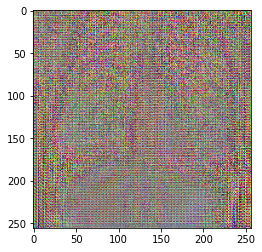

In [17]:
import matplotlib.pyplot as plt

img = plt.imread('./results/experiment_name/test_latest/images/0_fake.png')
plt.imshow(img)

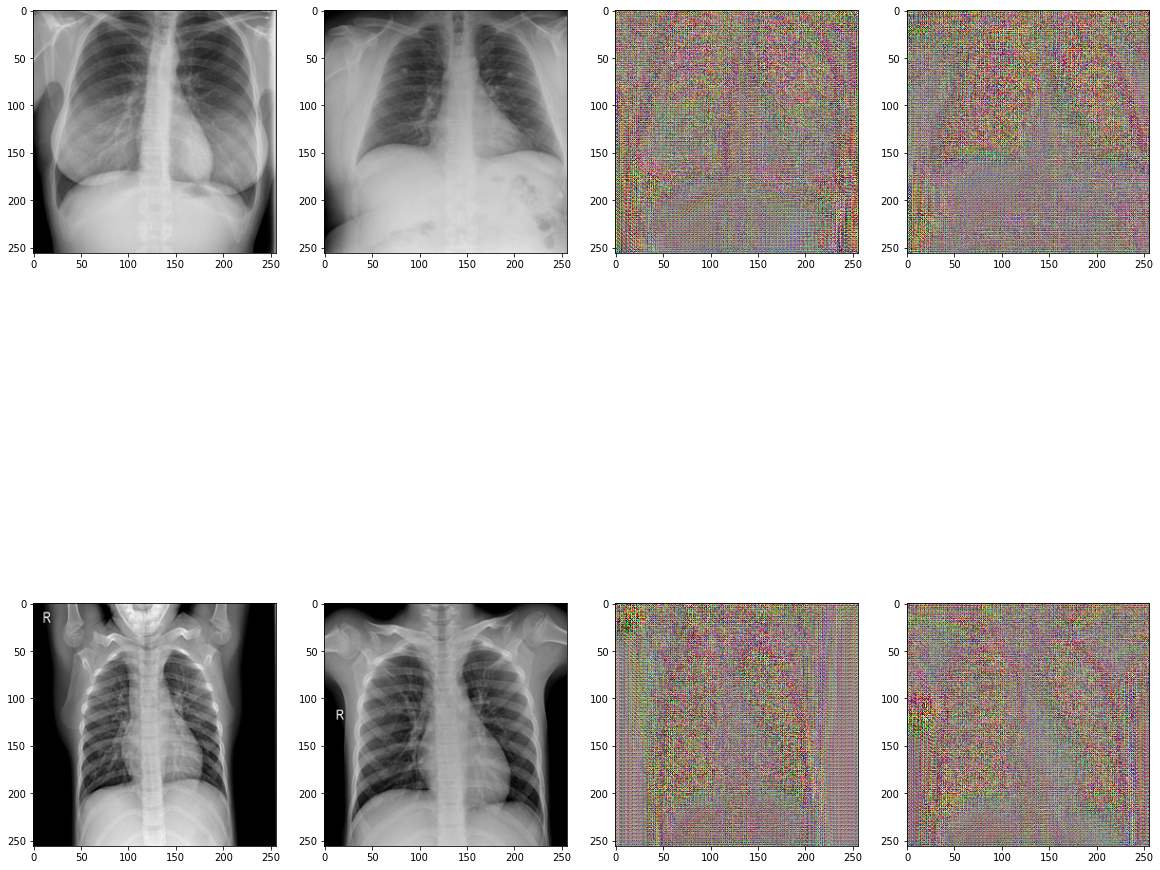

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
img1 = plt.imread('./results/experiment_name/test_latest/images/0_fake.png')
img2 = plt.imread('./results/experiment_name/test_latest/images/0_real.png')
img3 = plt.imread('./results/experiment_name/test_latest/images/10_fake.png')
img4 = plt.imread('./results/experiment_name/test_latest/images/10_real.png')
img5 = plt.imread('./results/experiment_name/test_latest/images/104_3_fake.png')
img6 = plt.imread('./results/experiment_name/test_latest/images/104_3_real.png')
img7 = plt.imread('./results/experiment_name/test_latest/images/109_3_fake.png')
img8 = plt.imread('./results/experiment_name/test_latest/images/109_3_real.png')


fig,axs = plt.subplots(2,4)
axs[0,0].imshow(img2)
axs[0,1].imshow(img4)
axs[0,2].imshow(img1)
axs[0,3].imshow(img3)
axs[1,0].imshow(img6)
axs[1,1].imshow(img8)
axs[1,2].imshow(img5)
axs[1,3].imshow(img7)

plt.show()